# **Práctica 4: Convolución y filtros**

<img src ="https://epigijon.uniovi.es/image/image_gallery?uuid=903ae5c8-b29b-430e-980d-1a19a885c736&groupId=3743853&t=1688576582973" width=300 px>

Este cuaderno desarrolla contenidos prácticos de la asignatura **Visión artificial** del Grado en Ciencia e Ingeniería de Datos.

***

# Convolución

La operación de convolución es un concepto fundamental en el campo del procesamiento de señales e imágenes, incluyendo el aprendizaje profundo. La convolución es por tanto una herramienta esencial en diversas disciplinas, desde el procesamiento de imágenes hasta la inteligencia artificial.

La convolución es un proceso que combina dos funciones para crear una tercera que representa cómo una de las funciones modifica la otra. En el contexto del procesamiento de señales, la convolución se utiliza para analizar cómo una señal responde a otra, y en el ámbito de la visión por computador y las redes neuronales convolucionales, la operación de convolución se aplica para extraer características clave de las imágenes.

La convolución es una operación fundamental en la identificación de patrones, detección de características relevantes y reducción de la dimensionalidad de datos, lo cual es crucial para el éxito de muchas aplicaciones modernas, como reconocimiento de objetos, segmentación de imágenes y procesamiento de lenguaje natural. Comprender los principios detrás de la operación de convolución es esencial para aquellos involucrados en campos como la informática, la ingeniería de señales y la inteligencia artificial, ya que sienta las bases para abordar problemas complejos y aprovechar al máximo las capacidades de los modelos computacionales.

Matemáticamente la convolución se define como:

$
g(x) = f(x) * h(x) = \int_{-\infty}^{\infty} f(\tau) \cdot h(x - \tau) \, d \tau
$

que de forma discreta se corresponde con

$
g[i] = (f * h)[i] = \sum_{n = 0}^{N -1} f[n] \cdot h[i - n]
$

De forma práctica se implementaría tal y como sigue.

In [20]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import scipy

f = (1, 2, 0, 7, 5)
h = (2, 3, 4)

g = np.convolve(f, h)

print(g)

[ 2  7 10 22 31 43 20]


En este caso, se rellenan los bordes con ceros. En caso de solamente necesitar aquella parte válida:

In [21]:
np.convolve(f, h, mode="valid")

array([10, 22, 31])

La implementación rellenando con ceros sería similar a la siguiente función:

In [22]:
def convolution(f, h):
    # Tamaño de las señales
    M = len(f)
    N = len(h)

    # Tamaño de la señal resultante
    conv = np.zeros(M + N - 1)

    for i in range(M + N - 1):
        for k in range(max(0, i - N + 1), min(M, i + 1)):
            conv[i] += f[k] * h[i - k]

    return conv

convolution(f, h)

array([ 2.,  7., 10., 22., 31., 43., 20.])

Analiza el código anterior e intenta comprender su funcionamiento. 

Otra forma de verlo sería con el código siguiente:

In [23]:
len_h = len(h)
fill_len = len(h)-1
                    
f_zeros = np.concatenate([np.zeros(fill_len), f, np.zeros(fill_len)])
print(f"f_zeros: {f_zeros}")

h_reversed = np.flip(h)
print(f"h_reversed: {h_reversed}")

for i in range(0, len(f_zeros) - fill_len):
    acum = 0
    for j in range(0, len(h)):
        acum += f_zeros[i+j] * h_reversed[j]

    print(f"g[{i}] = {acum}")

f_zeros: [0. 0. 1. 2. 0. 7. 5. 0. 0.]
h_reversed: [4 3 2]
g[0] = 2.0
g[1] = 7.0
g[2] = 10.0
g[3] = 22.0
g[4] = 31.0
g[5] = 43.0
g[6] = 20.0


La convolución en el dominio bidimensional (2D) es una extensión natural de la convolución en el dominio unidimensional (1D).

In [24]:
def convolution_2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    
    # Obtener las dimensiones de la imagen y el kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calcular las dimensiones del resultado de la convolución (parte válida)
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    # Inicializar la matriz de salida
    output = np.zeros((output_height, output_width))

    # Realizar la convolución
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)

    return output

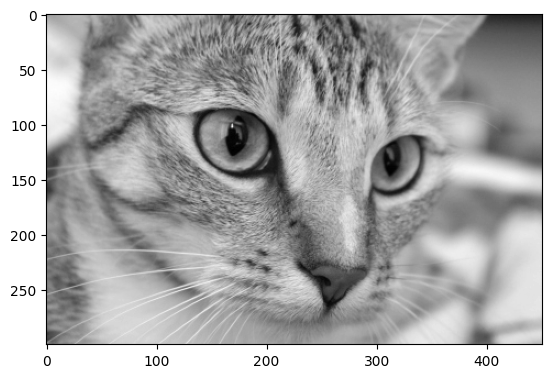

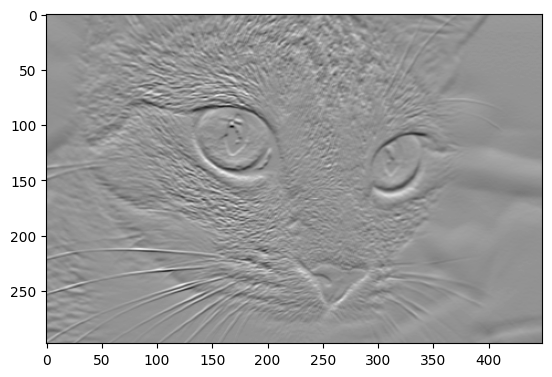

In [6]:
cat = skimage.data.chelsea()
cat_gray = skimage.color.rgb2gray(cat)
plt.imshow(cat_gray, cmap="gray")
plt.show()

kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
cat_edges = convolution_2d(cat_gray, kernel)
plt.imshow(cat_edges, cmap="gray")
plt.show()

La función `skimage.color.rgb2gray` convierte la imagen a flotante en escala [0, 1]

float64


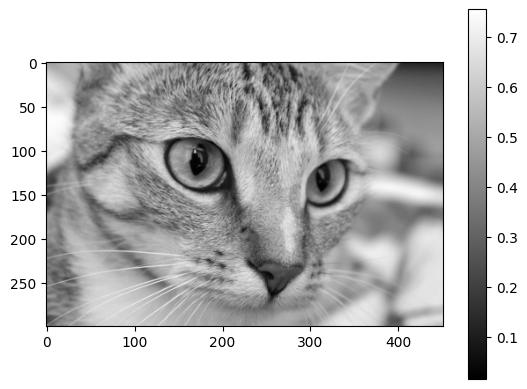

In [7]:
print(cat_gray.dtype)
plt.imshow(cat_gray, cmap="gray")
plt.colorbar()
plt.show()

El kernel utilizado sirve para calcular los bordes en sentido vertical.

Se puede verificar que el resultado coincide con la función de la biblioteca scipy:

In [8]:
cat_edges_scipy = scipy.signal.convolve2d(cat_gray, kernel, mode="valid")
np.allclose(cat_edges, cat_edges_scipy)

True

# Suavizado

> Realiza la convolución para obtener una versión suavizada de la imagen, donde cada píxel se sustituya por la medida en una vecindad de tamaño 15x15. Recuerda normalizar el kernel (que la suma de sus elementos sea 1) para no alterar el brillo de la imagen.

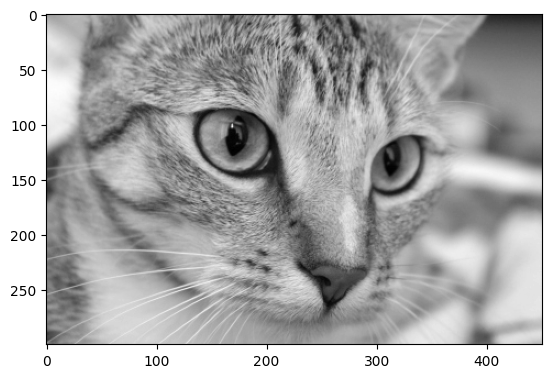

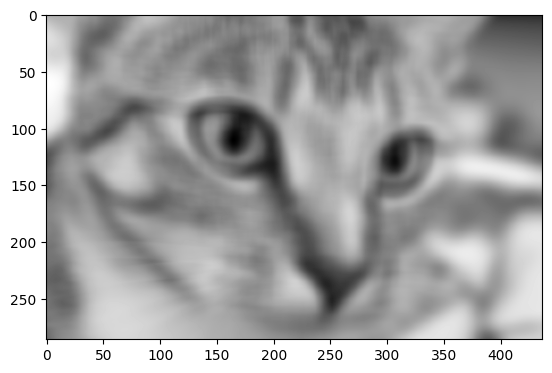

In [19]:
kernel=np.ones([15,15])
kernel/=225

cat = skimage.data.chelsea()
cat_gray = skimage.color.rgb2gray(cat)
plt.imshow(cat_gray, cmap="gray")
plt.show()

cat_edges = convolution_2d(cat_gray, kernel)
plt.imshow(cat_edges, cmap="gray")
plt.show()


El suavizado con una función gaussiana sería similar y se puede realizar directamente con una función de biblioteca:

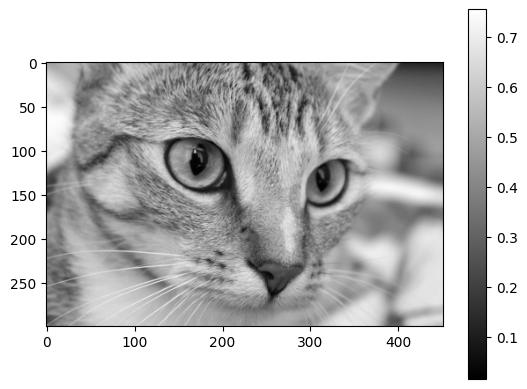

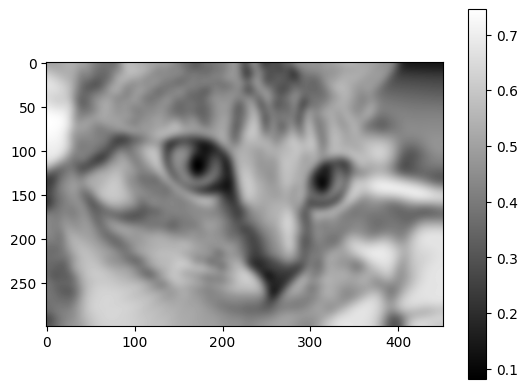

In [9]:
# desviación estándar de la distribución Gaussiana
sigma = 5 

# Calcula la convolución de la imagen con un kernel Gaussiano
cat_blur = scipy.ndimage.gaussian_filter(cat_gray, (sigma,sigma))
plt.imshow(cat_gray, cmap="gray")
plt.colorbar()
plt.show()
plt.imshow(cat_blur, cmap="gray")
plt.colorbar()
plt.show()

# Afilado

El afilado, o sharpening en inglés, es un proceso utilizado en el procesamiento de imágenes para resaltar los bordes y mejorar la nitidez aparente de los detalles. Este procedimiento busca realzar los contrastes locales en una imagen, haciendo que los límites entre regiones sean más distintivos.

Una de las opciones es el llamado algoritmo Unsharp masking, que consisten en realizar la siguiente operación sobre una imagen:

sharpened = original + (original − blurred) × amount

> Implementa esta operación sobre la imagen `http://www.atc.uniovi.es/grado/3va/prac/eye.png`

> Para cada canal de la imagen en color...
>
> Realiza una conversión a formato real en el rango [0, 1] (división del canal entre 255.0)
>
> Aplica `scipy.ndimage.gaussian_filter` sobre el resultado con sigma valor 5
>
> Realiza la operación `channel + (channel - blur) * strength` con strength valor 1.5. Se debe evitar que el resultado se salga del rango de representación.
>
> Devuelve el canal al rango [0, 255] (multiplicación por 255) y convierte a `np.uint8`

In [3]:
import numpy as np
import imageio.v3 as iio
import scipy.ndimage

def enhance_channel(channel, sigma=5, strength=1.5):
    # Normalizar al rango [0, 1]
    channel_float = channel.astype(np.float32) / 255.0

    # Aplicar el filtro Gaussiano
    blurred = scipy.ndimage.gaussian_filter(channel_float, sigma=sigma)

    # Aplicar la operación de realce
    enhanced = channel_float + (channel_float - blurred) * strength

    # Asegurar que los valores estén en el rango [0, 1]
    enhanced = np.clip(enhanced, 0, 1)

    # Convertir de vuelta al rango [0, 255] y a uint8
    return (enhanced * 255).astype(np.uint8)

def enhance_image(image, sigma=5, strength=1.5):
    # Aplicar el proceso a cada canal por separado
    return np.stack([enhance_channel(image[..., i], sigma, strength) for i in range(3)], axis=-1)

# Cargar la imagen
image = iio.imread("eye.png")

# Aplicar el procesamiento
enhanced_image = enhance_image(image)

# Guardar o mostrar la imagen procesada
iio.imwrite("imagen_enhanced.jpg", enhanced_image)


La operación anterior se podría aproximar usando un kernel similar al siguiente:

$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}
$

> Realiza el afilado de la imagen usando ese kernel y la función `convolution_2d`

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-394.0..672.0].


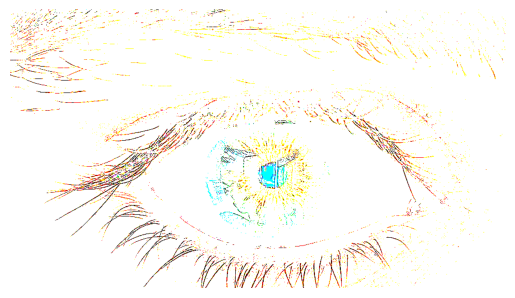

In [ ]:
image = iio.imread("eye.png")
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
processed_channels = [convolution_2d(image[..., i], kernel) for i in range(3)]
eye_afilado = np.stack(processed_channels, axis=-1)
# Mostrar la imagen procesada
plt.imshow(eye_afilado)
plt.axis("off")
plt.show()

# Gradiente

La misma función permite calcular la convolución con el operador FDoG (derivada de la Gaussiana).

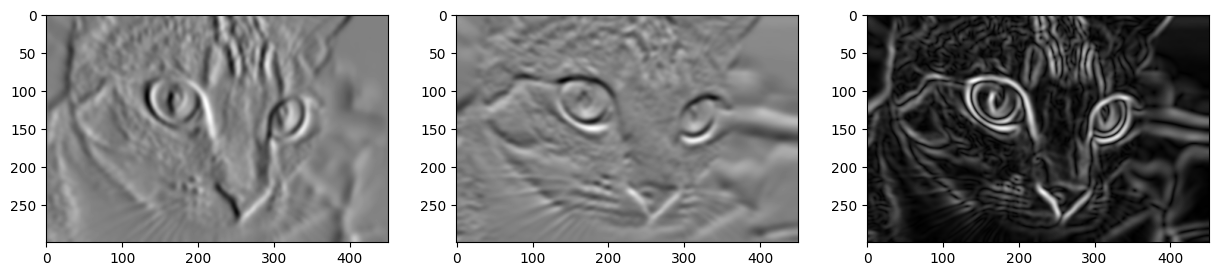

In [17]:
sigma = 3 # standard deviation

# Calcula la convolución de la imagen con la derivada del kernel Gaussiano en x
imx = scipy.ndimage.gaussian_filter(cat_gray, (sigma,sigma), (0,1))
# Calcula la convolución de la imagen con la derivada del kernel Gaussiano en y
imy = scipy.ndimage.gaussian_filter(cat_gray, (sigma,sigma), (1,0))
# Calcula la magnitud del gradiente
magnitude = np.sqrt(imx**2+imy**2)

# muestra el gradiente en x e y, y la magnitud del gradiente
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(imx, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(imy, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(np.sqrt(imx**2+imy**2), cmap="gray")
plt.show()

# Laplaciano

El operador Laplaciano es un operador diferencial utilizado en el procesamiento de imágenes para resaltar las regiones donde la intensidad varía rápidamente, como los bordes. Este operador es especialmente útil para detectar discontinuidades en una imagen.

$
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$

Este kernel suma los valores de los píxeles vecinos y resta 4 veces el valor del píxel central, dando como resultado la segunda derivada de la intensidad de la imagen. Esta operación resalta las regiones donde la intensidad varía rápidamente, lo que suele ocurrir en los bordes de los objetos en la imagen.

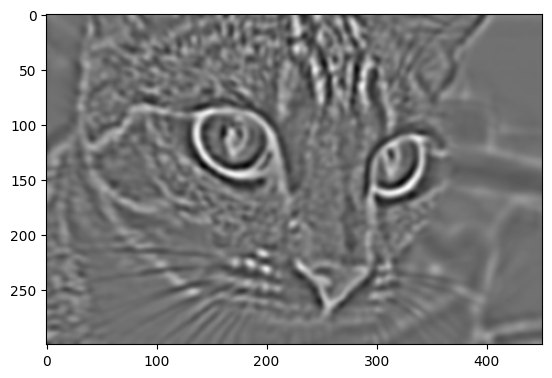

In [18]:
sigma = 3 # standard deviation
result = scipy.ndimage.gaussian_laplace(cat_gray, (sigma,sigma))
plt.imshow(result, cmap="gray")

# Imágenes híbridas

El filtrado paso bajo y el filtrado paso alto son técnicas comunes en procesamiento de imágenes utilizadas para resaltar o atenuar diferentes componentes de la imagen en función de sus frecuencias. 

El filtrado paso bajo se refiere a la técnica de resaltar las componentes de baja frecuencia de una imagen y atenuar o eliminar las componentes de alta frecuencia. Esto se logra mediante el uso de un filtro que deja pasar las frecuencias bajas y atenúa las frecuencias altas. En este caso se aplica una operación de convolución entre la imagen original y el núcleo (kernel) del filtro paso bajo, comúnmente un filtro gaussiano. La convolución da como resultado una nueva imagen donde las frecuencias altas han sido atenuadas, resaltando así las características de baja frecuencia. El filtrado paso bajo es utilizado para suavizar la imagen, eliminando detalles finos o ruido.

El filtrado paso alto, por otro lado, resalta las componentes de alta frecuencia de una imagen mientras atenúa las componentes de baja frecuencia. El filtro más comúnmente utilizado para el filtrado paso alto es el filtro de realce de bordes, como el filtro Laplaciano. Se aplica una operación de convolución entre la imagen original y el kernel del filtro paso alto, como el filtro Laplaciano. La convolución da como resultado una nueva imagen donde las frecuencias bajas (detalles grandes y suaves) han sido atenuadas, destacando así las características de alta frecuencia, como bordes y detalles finos. El filtrado paso alto es utilizado para resaltar los bordes y detalles finos en una imagen. También se usa para la detección de características, donde puede ser utilizado para detectar características específicas en una imagen.

Ambas técnicas, filtrado paso bajo y paso alto, se utilizan en conjunto en la creación de [imágenes híbridas](https://en.wikipedia.org/wiki/Hybrid_image), donde la imagen final combina las características de baja y alta frecuencia de dos imágenes diferentes. La idea principal es que al ver la imagen de cerca, predominen las características de alta frecuencia, mientras que al verla desde lejos, predominen las características de baja frecuencia.

> Busca dos imágenes que desees combinar y asegúrate de que tengan el mismo tamaño. Esto es crucial para garantizar una combinación adecuada.

> Realiza una alineación manual de las dos imágenes. Puedes utilizar software de edición de imágenes para superponerlas y ajustar la posición y la rotación hasta que estén alineadas de manera satisfactoria. Es importante que las características clave en ambas imágenes coincidan.
>
> Convierte ambas imágenes a escala de grises si no lo están.

> Aplica un filtro paso bajo (por ejemplo, un filtro gaussiano) a una de las imágenes para obtener la versión de baja frecuencia. Puedes usar la función `gaussian_filter` de la biblioteca `scipy.ndimage`.

> Aplica un filtro paso alto a la otra.

> Suma la imagen de baja frecuencia con la imagen de alta frecuencia. Asegúrate de que los valores de los píxeles estén en el rango adecuado (por ejemplo, 0 a 255).

> Visualiza ambas imágenes desde cerca y desde lejos. Al ver la imagen desde cerca, deberías notar principalmente las características de alta frecuencia (detalles finos, bordes). Al ver la imagen desde lejos, deberías notar principalmente las características de baja frecuencia (formas generales, suavizado).

> Ajusta la intensidad del filtrado paso bajo y alto según tus preferencias para lograr el efecto deseado. Experimenta con diferentes pares de imágenes para obtener resultados interesantes.

Recuerda que el éxito de la creación de imágenes híbridas a menudo depende de la elección de las imágenes de partida y de cómo se ajustan los parámetros de filtrado.


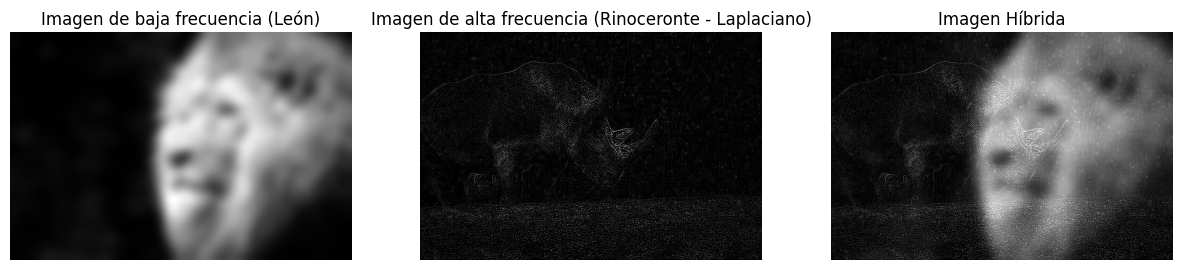

In [28]:
# Reimportar las bibliotecas necesarias debido al reinicio del estado de ejecución
import numpy as np
import imageio.v3 as iio
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize


leon = iio.imread("leon.jpg")
rinoceronte = iio.imread("rinoceronte.jpg")

# Convertir a escala de grises
leon_gray = rgb2gray(leon)
rinoceronte_gray = rgb2gray(rinoceronte)

# Redimensionar las imágenes para que tengan el mismo tamaño
target_shape = (min(leon_gray.shape[0], rinoceronte_gray.shape[0]),
                min(leon_gray.shape[1], rinoceronte_gray.shape[1]))

leon_resized = resize(leon_gray, target_shape, anti_aliasing=True)
rinoceronte_resized = resize(rinoceronte_gray, target_shape, anti_aliasing=True)

# Aplicar el filtro paso bajo a la imagen del león (suavizado)
low_freq_leon = scipy.ndimage.gaussian_filter(leon_resized, sigma=10)


# Definir el filtro Laplaciano para detección de alta frecuencia
laplacian_kernel = np.array([[0, 1, 0], 
                             [1, -4, 1], 
                             [0, 1, 0]])

# Aplicar el filtro Laplaciano a la imagen del rinoceronte
high_freq_rinoceronte = scipy.ndimage.convolve(rinoceronte_resized, laplacian_kernel)

# Normalizar los valores al rango [0, 1]
high_freq_rinoceronte = np.clip(high_freq_rinoceronte, 0, 1)

# Sumar la imagen de baja frecuencia con la imagen de alta frecuencia
hybrid_image = low_freq_leon + high_freq_rinoceronte
hybrid_image = np.clip(hybrid_image, 0, 1)

# Mostrar las imágenes con el nuevo filtrado Laplaciano
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(low_freq_leon, cmap="gray")
axes[0].set_title("Imagen de baja frecuencia (León)")
axes[0].axis("off")

axes[1].imshow(high_freq_rinoceronte, cmap="gray")
axes[1].set_title("Imagen de alta frecuencia (Rinoceronte - Laplaciano)")
axes[1].axis("off")

axes[2].imshow(hybrid_image, cmap="gray")
axes[2].set_title("Imagen Híbrida")
axes[2].axis("off")

plt.show()
